<a href="https://colab.research.google.com/github/deez79/GA_Python_FinalProject/blob/master/nhl_player_stats_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NHL Players from 1940 to 2018

* Link to Dataset:
https://www.kaggle.com/ace184/nhl-skater-stats

## Initial Setup:

### Mount Google Drive to Colab:




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Libraries:

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Dataset imported:

In [0]:
data_excel = "/content/drive/My Drive/DATAFILES/skater_stats.xlsx"
skaters = pd.read_excel(data_excel)

In [4]:
# Quick look at the data:
skaters.head()

,Key,Season,Player,Age,Tm,Pos,GP,G,GPG,A,PTS,+/-,PIM,EVG,PPG,SHG,GWG,EVA,PPA,SHA,S,S%,TOI,ATOI,BLK,HIT,FOwin,FOloss,FO%
0,2018Justin Abdelkader,2018,Justin Abdelkader,30.0,DET,LW,75,13,0.1733,22,35,-11,78,9,4,-,-,17,5,-,110,12,1241.0,16:33:00,40.0,174.0,47.0,50.0,48.5
1,2018Pontus Aberg,2018,Pontus Aberg,24.0,TOT,LW,53,4,0.0755,12,16,9,10,4,-,-,3,11,1,-,70,6,645.0,12:10:00,8.0,24.0,4.0,8.0,33.3
2,2018Noel Acciari,2018,Noel Acciari,26.0,BOS,C,60,10,0.1667,1,11,-6,9,9,-,1,-,1,-,-,66,15,775.0,12:55:00,41.0,152.0,42.0,51.0,45.2
3,2018Kenny Agostino,2018,Kenny Agostino,25.0,BOS,LW,5,-,0.0000,1,1,-1,4,-,-,-,-,-,1,-,11,-,60.0,12:03:00,1.0,4.0,0.0,1.0,0.0
4,2018Sebastian Aho,2018,Sebastian Aho,20.0,CAR,RW,78,29,0.3718,36,65,4,24,21,8,-,4,28,8,-,200,15,1398.0,17:55:00,17.0,65.0,78.0,94.0,45.3


## Initial Data Inspection:

### Genral Info:

In [0]:
# print(skaters.shape)
# print("-----------------------------------------------------")
# print(skaters.info())
# print("-----------------------------------------------------")
# print(skaters.describe())
# print("-----------------------------------------------------")
# print(skaters.dtypes)

* How big is the data?

In [6]:
rows, columns = skaters.shape

print(f'There are {rows} rows and {columns} columns')

There are 37825 rows and 29 columns


* What are the columns and what kind of data do they store?

In [7]:
print(skaters.dtypes)

Key        object
Season      int64
Player     object
Age       float64
Tm         object
Pos        object
GP          int64
G          object
GPG       float64
A          object
PTS        object
+/-        object
PIM        object
EVG        object
PPG        object
SHG        object
GWG        object
EVA        object
PPA        object
SHA        object
S          object
S%         object
TOI       float64
ATOI       object
BLK       float64
HIT       float64
FOwin     float64
FOloss    float64
FO%       float64
dtype: object


### Columns Explained:

* Let's define what each of the columns means:

| Abrv | Description   |
|------|---------------|
| Key  | Unique Key. Combination of Player and Season|
| Player | Player Name |
| Age  | Player Age |
| Tm | Player Team |
| Pos | Player Position |
| GP | Player Games Played |
| G | Player Goals Scored |
| GPG | Goals Per Game |
| A | Player Assists |
| PTS | Points. The Sum of Goals and Assists |
| +/- | Plus or Minus |
| PIM | Penalty Infraction Minutes |
| EVG | Even Strenght Goals |
| PPG | Power Play Goals |
| SHG | Short Handed Goals |
| GWG | Game Wining Goals |
| EVA | Even Strenght Assists |
| PPA | Power Play Assists |
| SHA | Short Handed Assists |
| S | Shots on Goal |
| S% | Shooting Percentage. Goals divided by Shots on Goal |
| TOI | Time on Ice |
| ATOI | Average Time on Ice |
| BLK | Blocks |
| HIT | Hits  |
| FOWin | Face Off Wins |
| FOLoss | Face Off Loss |
| FO% | Face Off Percentage | 

* links:
  * https://www.liveabout.com/nhl-stats-explained-2778914
  * https://www.answers.com/Q/What_does_evg_stand_for_in_hockey
  * https://www.tsn.ca/nhl/statistics




In [0]:
# players.head(20)

## Clean the Data:

### Remove excess spaces from Tm column:
* Further on when I was looking at Team data, I realized that there were spaces before  and after each team name, so we need to clean them out.

In [0]:
### --- A function to remove spaces from Team names in Tm column --- ###

def remove_space(col):
  c = col.values[0]
  if type(c) == str:
    # c = c.replace(' ', '')
    c = c.strip()
  return c
  

In [10]:
skaters['Tm'] = skaters[['Tm']].apply(remove_space, axis=1)

skaters.head()

,Key,Season,Player,Age,Tm,Pos,GP,G,GPG,A,PTS,+/-,PIM,EVG,PPG,SHG,GWG,EVA,PPA,SHA,S,S%,TOI,ATOI,BLK,HIT,FOwin,FOloss,FO%
0,2018Justin Abdelkader,2018,Justin Abdelkader,30.0,DET,LW,75,13,0.1733,22,35,-11,78,9,4,-,-,17,5,-,110,12,1241.0,16:33:00,40.0,174.0,47.0,50.0,48.5
1,2018Pontus Aberg,2018,Pontus Aberg,24.0,TOT,LW,53,4,0.0755,12,16,9,10,4,-,-,3,11,1,-,70,6,645.0,12:10:00,8.0,24.0,4.0,8.0,33.3
2,2018Noel Acciari,2018,Noel Acciari,26.0,BOS,C,60,10,0.1667,1,11,-6,9,9,-,1,-,1,-,-,66,15,775.0,12:55:00,41.0,152.0,42.0,51.0,45.2
3,2018Kenny Agostino,2018,Kenny Agostino,25.0,BOS,LW,5,-,0.0000,1,1,-1,4,-,-,-,-,-,1,-,11,-,60.0,12:03:00,1.0,4.0,0.0,1.0,0.0
4,2018Sebastian Aho,2018,Sebastian Aho,20.0,CAR,RW,78,29,0.3718,36,65,4,24,21,8,-,4,28,8,-,200,15,1398.0,17:55:00,17.0,65.0,78.0,94.0,45.3


In [11]:
skaters['Tm'].unique()

array(['DET', 'TOT', 'BOS', 'CAR', 'NYI', 'MTL', 'LAK', 'CBJ', 'NYR',
       'CGY', 'COL', 'CHI', 'BUF', 'VAN', 'WPG', 'NSH', 'PIT', 'EDM',
       'WSH', 'FLA', 'STL', 'ANA', 'VEG', 'MIN', 'DAL', 'OTT', 'SJS',
       'TOR', 'TBL', 'NJD', 'ARI', 'PHI', 'PHX', 'ATL', 'MDA', 'HAR',
       'WIN', 'QUE', 'MNS', 'CBH', 'CLR', 'ATF', 'CLE', 'CGS', 'KCS',
       'OAK', 'BRO', 'NYA'], dtype=object)

* link:
https://en.wikipedia.org/wiki/Template:NHL_team_abbreviations



In [12]:
### --- Take a peak at the data --- ###
skaters.head()

,Key,Season,Player,Age,Tm,Pos,GP,G,GPG,A,PTS,+/-,PIM,EVG,PPG,SHG,GWG,EVA,PPA,SHA,S,S%,TOI,ATOI,BLK,HIT,FOwin,FOloss,FO%
0,2018Justin Abdelkader,2018,Justin Abdelkader,30.0,DET,LW,75,13,0.1733,22,35,-11,78,9,4,-,-,17,5,-,110,12,1241.0,16:33:00,40.0,174.0,47.0,50.0,48.5
1,2018Pontus Aberg,2018,Pontus Aberg,24.0,TOT,LW,53,4,0.0755,12,16,9,10,4,-,-,3,11,1,-,70,6,645.0,12:10:00,8.0,24.0,4.0,8.0,33.3
2,2018Noel Acciari,2018,Noel Acciari,26.0,BOS,C,60,10,0.1667,1,11,-6,9,9,-,1,-,1,-,-,66,15,775.0,12:55:00,41.0,152.0,42.0,51.0,45.2
3,2018Kenny Agostino,2018,Kenny Agostino,25.0,BOS,LW,5,-,0.0000,1,1,-1,4,-,-,-,-,-,1,-,11,-,60.0,12:03:00,1.0,4.0,0.0,1.0,0.0
4,2018Sebastian Aho,2018,Sebastian Aho,20.0,CAR,RW,78,29,0.3718,36,65,4,24,21,8,-,4,28,8,-,200,15,1398.0,17:55:00,17.0,65.0,78.0,94.0,45.3


### Change Column Types so we can do calculations:

* How to make all the columns floats or ints as needed?

In [0]:
### --- A function to change dashes with zeros --- ###

def replace_dash(col):
  c = col.values[0]

  if type(c) == int:
    return c 
  
  if type(c) == str:
    c = c.strip()
    try:
      c_int = int(c)
      if pd.isnan(c_int):
        return 0
      return c_int
    except:
      return 0
  else:
    return c

In [0]:
### --- A list of Columns to Fix --- ###
cols_to_fix = ['GP', 'G', 'GPG', 'A', 'PTS', '+/-', 'PIM', 'EVG', 'PPG', 'SHG', 'GWG', 'EVA', 'PPA', 'SHA', 'S', 'S%', 'TOI', 'ATOI', 'BLK', 'HIT', 'FOwin', 'FOloss', 'FO%' ]

### ---  A loop to run the function on each cell in the columns we need to fix --- ###
for col_var in cols_to_fix:
  skaters[col_var] = skaters[[col_var]].apply(replace_dash, axis=1)

In [15]:
### --- lets look at the top of the data --- ###
skaters.head()

,Key,Season,Player,Age,Tm,Pos,GP,G,GPG,A,PTS,+/-,PIM,EVG,PPG,SHG,GWG,EVA,PPA,SHA,S,S%,TOI,ATOI,BLK,HIT,FOwin,FOloss,FO%
0,2018Justin Abdelkader,2018,Justin Abdelkader,30.0,DET,LW,75,13,0.1733,22,35,-11.0,78.0,9.0,4.0,0.0,0.0,17.0,5.0,0.0,110.0,12.0,1241.0,16:33:00,40.0,174.0,47.0,50.0,48.5
1,2018Pontus Aberg,2018,Pontus Aberg,24.0,TOT,LW,53,4,0.0755,12,16,9.0,10.0,4.0,0.0,0.0,3.0,11.0,1.0,0.0,70.0,6.0,645.0,12:10:00,8.0,24.0,4.0,8.0,33.3
2,2018Noel Acciari,2018,Noel Acciari,26.0,BOS,C,60,10,0.1667,1,11,-6.0,9.0,9.0,0.0,1.0,0.0,1.0,0.0,0.0,66.0,15.0,775.0,12:55:00,41.0,152.0,42.0,51.0,45.2
3,2018Kenny Agostino,2018,Kenny Agostino,25.0,BOS,LW,5,0,0.0000,1,1,-1.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.0,0.0,60.0,12:03:00,1.0,4.0,0.0,1.0,0.0
4,2018Sebastian Aho,2018,Sebastian Aho,20.0,CAR,RW,78,29,0.3718,36,65,4.0,24.0,21.0,8.0,0.0,4.0,28.0,8.0,0.0,200.0,15.0,1398.0,17:55:00,17.0,65.0,78.0,94.0,45.3


In [16]:
### --- lets look at the bottom of the data --- ###
skaters.tail()

,Key,Season,Player,Age,Tm,Pos,GP,G,GPG,A,PTS,+/-,PIM,EVG,PPG,SHG,GWG,EVA,PPA,SHA,S,S%,TOI,ATOI,BLK,HIT,FOwin,FOloss,FO%
37820,1940Gordie Drillon*,1940,Gordie Drillon*,26.0,TOR,RW,43,21,0.4884,19,40,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37821,1940Bill Cowley*,1940,Bill Cowley*,27.0,BOS,C,48,13,0.2708,27,40,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37822,1940Woody Dumart*,1940,Woody Dumart*,23.0,BOS,LW,48,22,0.4583,21,43,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37823,1940Bobby Bauer*,1940,Bobby Bauer*,24.0,BOS,RW,48,17,0.3542,26,43,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37824,1940Milt Schmidt*,1940,Milt Schmidt*,21.0,BOS,C,48,22,0.4583,30,52,NaN,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Replace NaN's with 0's:

In [0]:
### ---  Replace NA's with 0's --- ###
skaters = skaters.fillna(0)

In [18]:
### --- Make sure the bottom of the data is good too --- ###
skaters.tail(10)

,Key,Season,Player,Age,Tm,Pos,GP,G,GPG,A,PTS,+/-,PIM,EVG,PPG,SHG,GWG,EVA,PPA,SHA,S,S%,TOI,ATOI,BLK,HIT,FOwin,FOloss,FO%
37815,1940Toe Blake*,1940,Toe Blake*,27.0,MTL,LW,48,17,0.3542,19,36,0.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
37816,1940Murray Armstrong,1940,Murray Armstrong,24.0,NYA,C,47,16,0.3404,20,36,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
37817,1940Syd Howe*,1940,Syd Howe*,28.0,DET,C,46,14,0.3043,23,37,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
37818,1940Neil Colville*,1940,Neil Colville*,25.0,NYR,C,48,19,0.3958,19,38,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
37819,1940Bryan Hextall*,1940,Bryan Hextall*,26.0,NYR,RW,48,24,0.5000,15,39,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
37820,1940Gordie Drillon*,1940,Gordie Drillon*,26.0,TOR,RW,43,21,0.4884,19,40,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
37821,1940Bill Cowley*,1940,Bill Cowley*,27.0,BOS,C,48,13,0.2708,27,40,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
37822,1940Woody Dumart*,1940,Woody Dumart*,23.0,BOS,LW,48,22,0.4583,21,43,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
37823,1940Bobby Bauer*,1940,Bobby Bauer*,24.0,BOS,RW,48,17,0.3542,26,43,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
37824,1940Milt Schmidt*,1940,Milt Schmidt*,21.0,BOS,C,48,22,0.4583,30,52,0.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0


## Ask some questions about the data:

#### How many Teams are there?

In [19]:
print(skaters['Tm'].unique())
print(skaters['Tm'].nunique())

['DET' 'TOT' 'BOS' 'CAR' 'NYI' 'MTL' 'LAK' 'CBJ' 'NYR' 'CGY' 'COL' 'CHI'
 'BUF' 'VAN' 'WPG' 'NSH' 'PIT' 'EDM' 'WSH' 'FLA' 'STL' 'ANA' 'VEG' 'MIN'
 'DAL' 'OTT' 'SJS' 'TOR' 'TBL' 'NJD' 'ARI' 'PHI' 'PHX' 'ATL' 'MDA' 'HAR'
 'WIN' 'QUE' 'MNS' 'CBH' 'CLR' 'ATF' 'CLE' 'CGS' 'KCS' 'OAK' 'BRO' 'NYA']
48


### How many Players have played in the NHL?

In [20]:
player_count = skaters['Player'].nunique()
print(f'There are {player_count} players in this dataset.')

There are 6464 players in this dataset.


## Answer the following questions:





#### What was the highest number of goals scored per season by a player?

In [21]:
skaters[['Player','Pos', 'Tm','Season', 'G']].sort_values(by = ['G', 'Season'], ascending=False).head(10)

,Player,Pos,Tm,Season,G
28219,Wayne Gretzky*,C,EDM,1982,92
27001,Wayne Gretzky*,C,EDM,1984,87
22544,Brett Hull*,RW,STL,1991,86
23863,Mario Lemieux*,C,PIT,1989,85
21170,Alexander Mogilny,RW,BUF,1993,76
21173,Teemu Selanne,RW,WIN,1993,76
33047,Phil Esposito*,C,BOS,1971,76
26381,Wayne Gretzky*,C,EDM,1985,73
23196,Brett Hull*,RW,STL,1990,72
26380,Jari Kurri*,RW,EDM,1985,71


* Looks like Wayne Gretzky has the most goals scored in a single season.  
* In 1982, he scored 92 goals.  That's a lot of goals!
* He also has the second place position, as well as the 8th.  That is nothing to sneeze at.

### Which Goalie scored the most goals?


* First Let's find out what the Goalie position is abreviated in the dataset:

In [22]:
skaters['Pos'].unique()

array([' LW ', ' C ', ' RW ', ' D ', ' RW/LW ', ' LW/RW ', ' RW/C ',
       ' C/LW ', ' LW/C ', ' LW/D ', ' RW/D ', ' C/RW ', ' C/RW/ ',
       ' D/LW ', ' C/LW/ ', ' D/RW ', ' F ', ' W/D ', ' W ', ' C/D '],
      dtype=object)

* Well dang, it doesn't look like we have any goalies in this data.  
* This question can't be answered with our data.  Bummer.

### Player with most career Goals?

In [23]:
skaters.groupby(by='Player')['G'].sum().sort_values(ascending=False).head(10)

Player
Wayne Gretzky*    894
Gordie Howe*      801
Jaromir Jagr      766
Brett Hull*       741
Marcel Dionne*    731
Phil Esposito*    717
Mike Gartner*     708
Mark Messier*     694
Steve Yzerman*    692
Mario Lemieux*    690
Name: G, dtype: int64

* Looks like Gretzky has the most Career Goals!
* Want to see Career Points?  Me too.

In [24]:
skaters.groupby(by='Player')['PTS'].sum().sort_values(ascending=False).head(10)

Player
Wayne Gretzky*    2857
Jaromir Jagr      1921
Mark Messier*     1887
Gordie Howe*      1850
Ron Francis*      1798
Marcel Dionne*    1771
Steve Yzerman*    1755
Mario Lemieux*    1723
Joe Sakic*        1641
Phil Esposito*    1590
Name: PTS, dtype: int64

### Which Ranger has the highest Pts?


* I have always been a Rangers fan, so why not learn a little about the team.

In [0]:
team = "NYR"

* Let's look at a single season first:

In [26]:
skaters[ skaters['Tm'] == team].sort_values(by='PTS', ascending=False).head(5)

,Key,Season,Player,Age,Tm,Pos,GP,G,GPG,A,PTS,+/-,PIM,EVG,PPG,SHG,GWG,EVA,PPA,SHA,S,S%,TOI,ATOI,BLK,HIT,FOwin,FOloss,FO%
10543,2006Jaromir Jagr,2006,Jaromir Jagr,33.0,NYR,RW,82,54,0.6585,69,123,34.0,72.0,30.0,24.0,0.0,9.0,41.0,28.0,0.0,368.0,15.0,1810.0,22:05:00,0.0,0.0,0.0,0.0,0.0
32700,1972Jean Ratelle*,1972,Jean Ratelle*,31.0,NYR,C,63,46,0.7302,63,109,61.0,4.0,40.0,5.0,1.0,6.0,45.0,18.0,0.0,183.0,25.0,0.0,0,0.0,0.0,0.0,0.0,0.0
21882,1992Mark Messier*,1992,Mark Messier*,31.0,NYR,C,79,35,0.4430,72,107,31.0,76.0,19.0,12.0,4.0,6.0,46.0,21.0,5.0,212.0,17.0,0.0,0,0.0,0.0,0.0,0.0,0.0
32699,1972Vic Hadfield,1972,Vic Hadfield,31.0,NYR,LW,78,50,0.6410,56,106,60.0,142.0,27.0,23.0,0.0,7.0,44.0,12.0,0.0,242.0,21.0,0.0,0,0.0,0.0,0.0,0.0,0.0
28207,1982Mike Rogers,1982,Mike Rogers,27.0,NYR,C,80,38,0.4750,65,103,2.0,43.0,31.0,6.0,1.0,2.0,36.0,29.0,0.0,213.0,18.0,0.0,0,0.0,0.0,0.0,0.0,0.0


* How about for a career:

In [27]:
skaters[ skaters['Tm'] == team].groupby('Player').sum().sort_values(by='PTS', ascending=False).head(5)

,Season,Age,GP,G,GPG,A,PTS,+/-,PIM,EVG,PPG,SHG,GWG,EVA,PPA,SHA,S,S%,TOI,BLK,HIT,FOwin,FOloss,FO%
Player,,,,,,,,,,,,,,,,,,,,,,,,
Rod Gilbert*,35451,495.0,1065,406,5.8588,615,1021,89.0,508.0,287.0,108.0,0.0,50.0,317.0,168.0,0.0,2291.0,145.0,0.0,0.0,0.0,0.0,0.0,0.0
Brian Leetch*,31928,424.0,1072,227,3.2740,718,945,29.0,501.0,118.0,102.0,7.0,36.0,312.0,393.0,13.0,3304.0,107.0,9655.0,0.0,0.0,0.0,0.0,0.0
Jean Ratelle*,29520,405.0,849,331,5.4863,471,802,166.0,190.0,233.0,79.0,2.0,41.0,274.0,116.0,0.0,1579.0,140.0,0.0,0.0,0.0,0.0,0.0,0.0
Mark Messier*,19977,367.0,698,250,3.4958,441,691,74.0,667.0,155.0,72.0,23.0,41.0,253.0,160.0,28.0,1658.0,148.0,5043.0,0.0,0.0,0.0,0.0,0.0
Walt Tkaczuk,27643,371.0,945,227,3.0761,451,678,185.0,556.0,175.0,41.0,11.0,23.0,363.0,70.0,18.0,2146.0,134.0,0.0,0.0,0.0,0.0,0.0,0.0


## Graph the following:


### What age do players score the most goals?


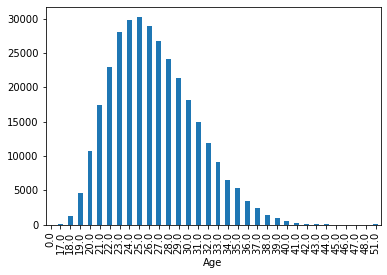

In [28]:
goal_age = skaters.groupby(by='Age')['G'].sum()

goal_age.plot(kind='bar', x='Age', y='G')

### Year most goals were scored

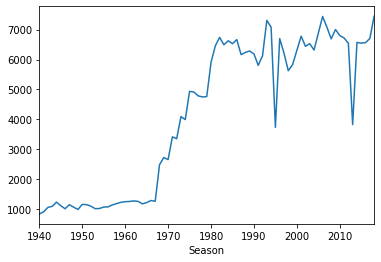

In [29]:
goals_per_year = skaters.groupby(by='Season').sum()['G']

goals_per_year.plot(kind='line', x='Season', y='G')

* I was trying to figure out how to solve this, and came upon an anomoli:

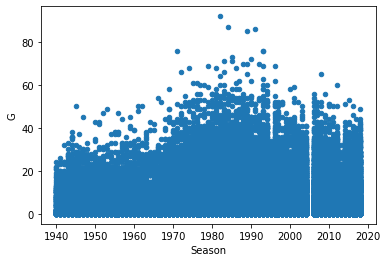

In [30]:
skaters.plot(kind='scatter', x='Season', y='G')

It appears that no goals were scored by anyone in ~2005.  Then it dawned on me... that was the year that the NHL season was cancelled.  I had totally forgotten about that.  

(The graph plots all the players and the number of goals they scored each season.  This is clearly not what the original question asked, but it did show an anomoli, so I am shareing it.)

### Teams with the players that scored the most points

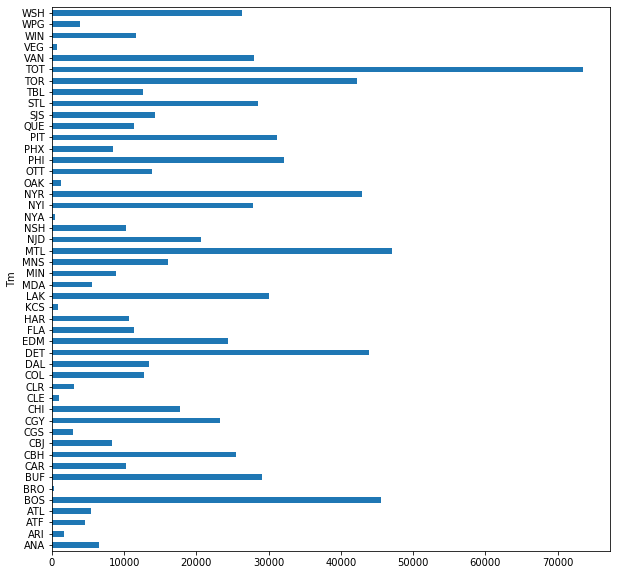

In [31]:
team_points = skaters.groupby('Tm')['PTS'].sum()

team_points.plot(kind='barh', x='Tm', y='PTS', figsize=(10,10))

* TOT isn't a team I know of. Is it a Total for a player for a season?  Let's look at a players career to see:

In [32]:
skaters[ skaters['Player'] == 'Pontus Aberg' ]

,Key,Season,Player,Age,Tm,Pos,GP,G,GPG,A,PTS,+/-,PIM,EVG,PPG,SHG,GWG,EVA,PPA,SHA,S,S%,TOI,ATOI,BLK,HIT,FOwin,FOloss,FO%
1,2018Pontus Aberg,2018,Pontus Aberg,24.0,TOT,LW,53,4,0.0755,12,16,9.0,10.0,4.0,0.0,0.0,3.0,11.0,1.0,0.0,70.0,6.0,645.0,12:10:00,8.0,24.0,4.0,8.0,33.3
892,2017Pontus Aberg,2017,Pontus Aberg,23.0,NSH,LW,15,1,0.0667,1,2,-2.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,12.0,8.0,185.0,12:20:00,2.0,9.0,1.0,0.0,100.0


Well, that doesn't help.  I guess we should ignore it.

### Goals per year for most goals scored player

Let's make this one more interactive.  We will have a function ask for your prefered player, and then we will graph the results.

In [0]:
def name_check(prompt):
  p_name = input(prompt)
  col = set(skaters['Player'])
  try:
    if p_name in col:
      print(f'{p_name} is in column') 
      return p_name
    else:
      p_name = p_name + "*" 
      if p_name in set(col):
        print(f'{p_name} is in column') 
        return p_name

  except:
    print('The Name you are looking for caused an error')
  print('The name you entered is not in the dataset')


In [34]:
player_name = name_check("Enter the player to graph: \n")

Enter the player to graph: 
Mark Messier
Mark Messier* is in column


In [0]:
# player_name = ["Mark Messier*", "Wayne Gretzky*"]

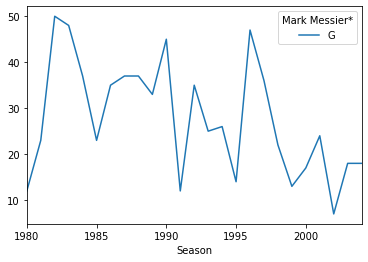

In [36]:
skaters[skaters['Player'] == player_name].plot(kind='line', x='Season', y='G').legend(title=player_name)

In [0]:
# skaters[skaters['Player'] == "Mark Messier*"].plot(kind='line', x='Season', y='G').legend(title=player_name)
# skaters[skaters['Player'] == "Wayne Gretzky*"].plot(kind='line', x='Season', y='G').legend(title=player_name)


In [0]:
# # player_name = ["Mark Messier*", "Wayne Gretzky*"]
# player_name = ["Mark Messier*"]

# for name in player_name:
#   skaters[skaters['Player'] == player_name].plot(kind='line', x='Season', y='G').legend(title=player_name)